# Homework 03
### [Chia-Chun Chao]

### Read all tweets and store created time and text in a list

In [1]:
import json
import gzip

tweetList = [] #This will be a list of lists containing two elements
tweetNum = 0 #Calculate the number of tweets

print("index".ljust(13), "created_at".ljust(25), "original text")
print("--------------------------------------------------------------------------")

#Read all tweet in the file
for line in gzip.open("HW03_twitterData.json.txt.gz", 'rt', encoding='utf-8'):
    tweet = json.loads(line.strip())
    #Store created_at and text to a list
    tweetList.append([tweet["created_at"], tweet["text"]])
    tweetNum += 1

#Print 10 tweets
for i in range(10):
    print("[{}]".format(i), '  ', tweetList[i][0], '  ', tweetList[i][1])


index         created_at                original text
--------------------------------------------------------------------------
[0]    Fri, 02 Nov 2012 19:59:51    RT @MittRomney: This election is about delivering real change to Americans who need it.  http://t.co/UEZhDRvZ
[1]    Thu, 25 Oct 2012 11:54:12    @BarackObama @MittRomney @PaulRyanVP http://t.co/da9Q7rGJ
[2]    Wed, 24 Oct 2012 23:59:43    @BarackObama our economy did not get into this recession in just a few years leading to his presidency
[3]    Sun, 04 Nov 2012 07:47:22    "Vote for love of country, not revenge" @MittRomney
[4]    Thu, 01 Nov 2012 09:45:15    Making phone calls for @repchipcravaack @mittromney and @paulryanvp on my 21st birthday. Can I get a RT? #tcot #mncrs #gop
[5]    Tue, 06 Nov 2012 20:59:57    RT @dylaaanking: "@MittRomney: A brighter future is out there waiting for us. Let’s choose it today" by voting obama
[6]    Sat, 03 Nov 2012 22:58:28    RT @Shoq: IF THIS ISN'T THE WINNER for best @MittRomney 

### Build the data
Only English letters, numbers, underscore, comma, and whitespace are maintained, so other punctuation, special symbols, and other languages are cleared. Also, all letters are converted to lowercase.

If a word contains "obama" or "barack", this tweet will be determined to be about Obama. If a word contains "romney" or "mitt", this tweet will be determined to be about Romney. Nick names of Obama and Romney are not considered, so a tweet about Barry will not be stored to the list of Obama or Romney.

"RT" and URLs are deleted because I suppose that these two are meaningless for this analysis.


In [2]:
from string import punctuation
import re

exclude = set(punctuation) #Keep a set of "bad" characters.

obamaList = [] #Store all processed tweets about Obama
romneyList = [] #Store all processed tweets about Romney
neutralList = [] #Store all precessed tweets about neither Obama nor Romney
removeList = [] #Store all words that we want to remove

index=0 #Save index of each tweet to check the original tweet

#Loop for every tweet
for created_at, text in tweetList:
    """
    Clear all punctuation and special characters, 
    and only maintain English letters, numbers, underscore, comma, and whitespace
    """    
    #Only English letters, numbers, underscore, comma, and whitespace are maintained
    wordAndSpace = re.findall(r'[a-zA-Z0-9\s,_]', text) #A list of characters that we want to keep
    #Clear all punctuation and special characters
    listOfLetters = [ char for char in text if char not in exclude and char in wordAndSpace] 
    wordText = "".join(listOfLetters) #Join all letters back together to get a string
    listOfWords = wordText.lower().strip().split() #Convert all letters to lowercase and split this string into a list of words    
   
    obamaFlag = 0
    romneyFlag = 0
    removeList.clear()
    
    """
    Remove "RT" and URL and set flags of Obama or Romney
    """
    for word in listOfWords:   
        if word == "rt": #Remove RT
            removeList.append(word)
            continue
        elif word.startswith("http"): #Remove URL
            removeList.append(word)
            continue
        
        #Set flag for later classification
        if obamaFlag == 0 and ("obama" in word or "barack" in word): #Check if there exists obama in the text
            obamaFlag = 1
        if romneyFlag == 0 and ("romney" in word or "mitt" in word): #Check if there exists romney in the text
            romneyFlag = 1
    
    for word in removeList:#Remove RT and URL
        listOfWords.remove(word)

    """
    Classify this text to Obama, Romney, both, or neither
    """        
    #Classify this text to Obama, Romney, both, or neither
    if obamaFlag == 1:
        obamaList.append([index, created_at, listOfWords])
    if romneyFlag == 1:
        romneyList.append([index, created_at, listOfWords])
    if obamaFlag == 0 and romneyFlag == 0:
        neutralList.append([index, created_at, listOfWords])
    
    index += 1

In [3]:
print("\n-------------------5 Tweets about Obama after processing-------------------")
print("index".ljust(13), "created_at".ljust(25), "list of processed text")
print("--------------------------------------------------------------------------")
for i in range(5):
    print("[{}]".format(obamaList[i][0]).ljust(7), obamaList[i][1], " ", obamaList[i][2])
print("\n-------------------5 Tweets about Romney after processing-------------------")
print("index".ljust(13), "created_at".ljust(25), "list of processed text")
print("--------------------------------------------------------------------------")
for i in range(5):
    print("[{}]".format(romneyList[i][0]).ljust(7), romneyList[i][1], " ", romneyList[i][2])
print("\n-------------------5 neutral tweets after processing-------------------")
print("index".ljust(13), "created_at".ljust(25), "list of processed text")
print("--------------------------------------------------------------------------")
for i in range(5):
    print("[{}]".format(neutralList[i][0]).ljust(7), neutralList[i][1], " ", neutralList[i][2])


-------------------5 Tweets about Obama after processing-------------------
index         created_at                list of processed text
--------------------------------------------------------------------------
[1]     Thu, 25 Oct 2012 11:54:12   ['barackobama', 'mittromney', 'paulryanvp']
[2]     Wed, 24 Oct 2012 23:59:43   ['barackobama', 'our', 'economy', 'did', 'not', 'get', 'into', 'this', 'recession', 'in', 'just', 'a', 'few', 'years', 'leading', 'to', 'his', 'presidency']
[5]     Tue, 06 Nov 2012 20:59:57   ['dylaaanking', 'mittromney', 'a', 'brighter', 'future', 'is', 'out', 'there', 'waiting', 'for', 'us', 'lets', 'choose', 'it', 'today', 'by', 'voting', 'obama']
[7]     Wed, 07 Nov 2012 15:59:50   ['barackobama', 'heyyy', 'abang', 'follow', 'meeee', 'i', 'will', 'follow', 'u', 'back', 'uzbekistan']
[10]    Thu, 25 Oct 2012 02:59:32   ['i', 'love', 'that', 'barackobama', 'is', 'making', 'history', 'as', 'the', 'first', 'sitting', 'president', 'to', 'vote', 'early', 'get', 

### Count the tweets
This plot is saved to "all.png".

In [4]:
def count_numbers(timeList):
    """Takes a list of created time and counts how many times each time occurred.
    Returns two lists, the sorted values within L and the corresponding number 
    of times each value occurred. This is useful for plotting.
    """
    countDict = {} # or use collections.Counter()
    
    for time in timeList:
        try:
            countDict[time] += 1
        except KeyError: # never seen this v before, so initialize it
            countDict[time] = 1
            
    timeList = sorted(countDict.keys())
    numberList = []
    for time in timeList:
        numberList.append(countDict[time])
    
    return timeList, numberList

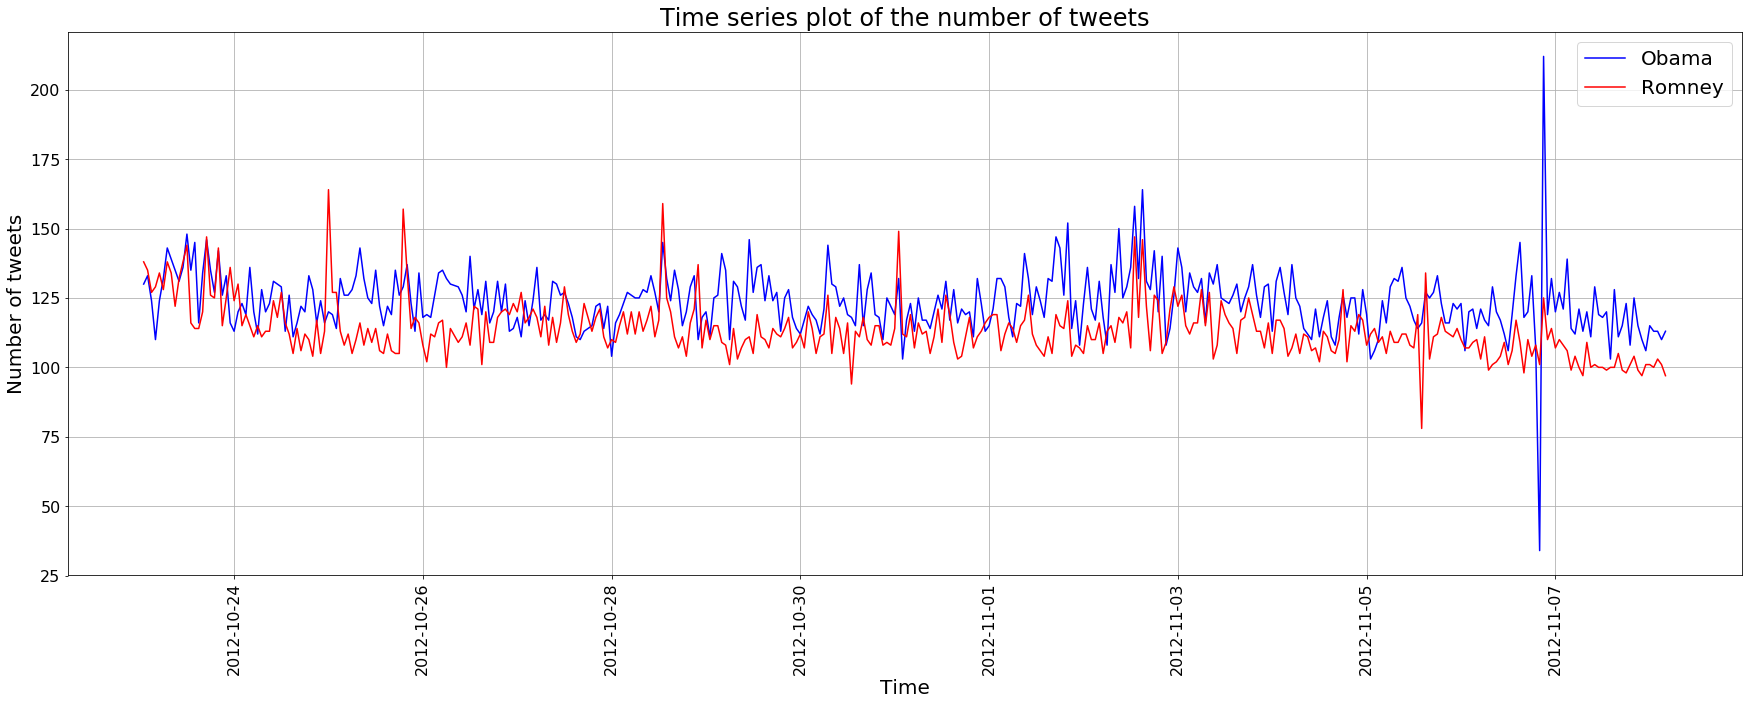

In [5]:
import datetime
import matplotlib.pyplot as plt

#Count the number of Obama tweet that were created at the hour
timeList=[]
for tweet in obamaList:
    timeList.append(datetime.datetime.strptime(tweet[1][0:-6], "%a, %d %b %Y %H")) #Parse created_at and ignore minute and second
time, number = count_numbers(timeList)

#Count the number of Romney tweets that were created at the hour
timeList2=[]
for tweet in romneyList:
    timeList2.append(datetime.datetime.strptime(tweet[1][0:-6], "%a, %d %b %Y %H")) #Parse created_at and ignore minute and second
time2, number2 = count_numbers(timeList2)


plt.figure(figsize=(30,10))
plt.plot(time, number, '-', color='b', label="Obama")
plt.plot(time2, number2, '-', color='r', label="Romney")
plt.title("Time series plot of the number of tweets", fontsize=24)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Number of tweets", fontsize=20)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('all.png')
plt.show()



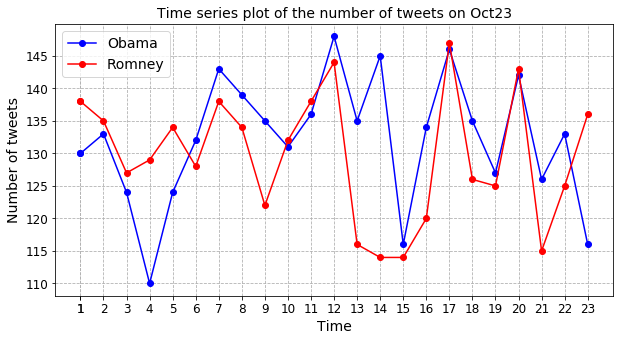

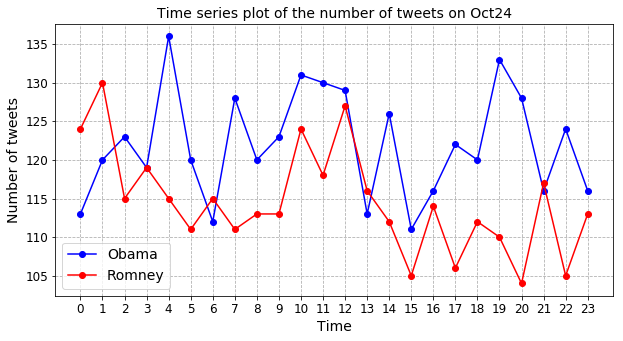

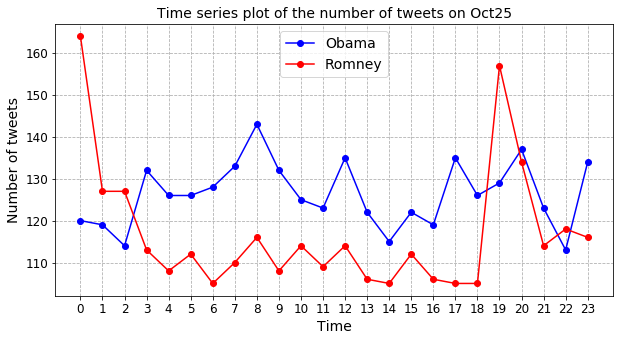

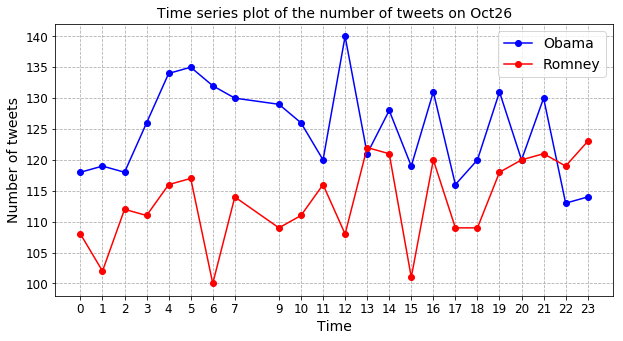

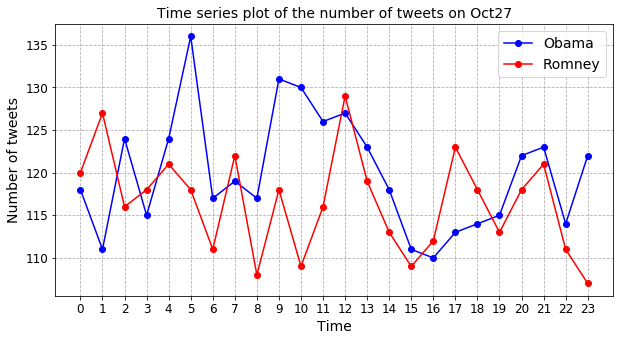

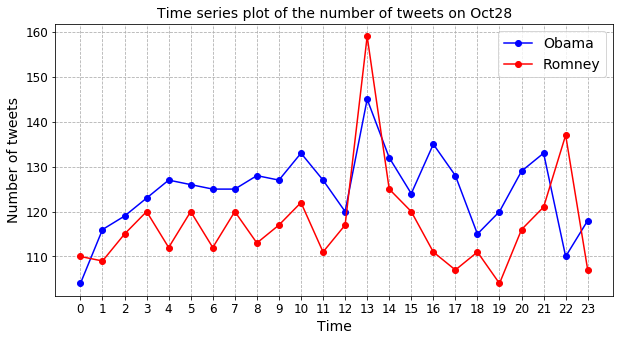

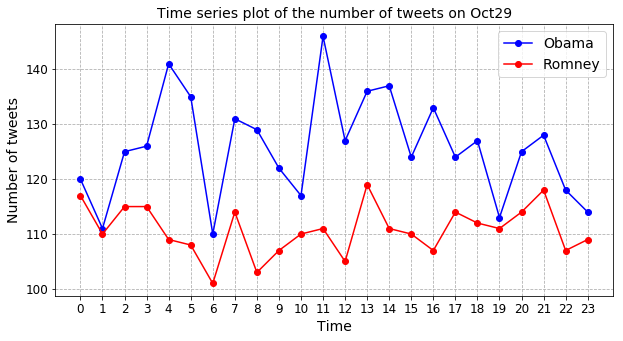

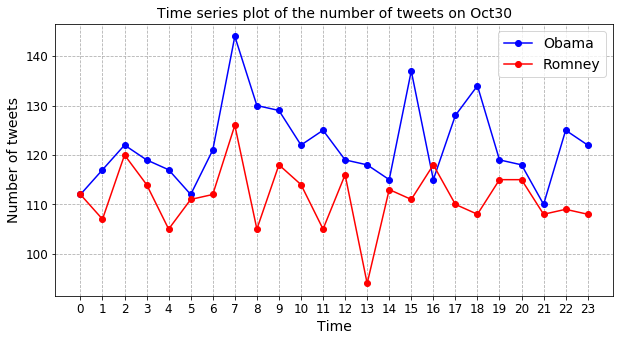

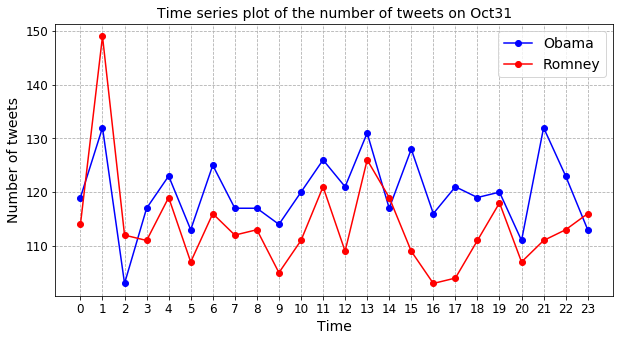

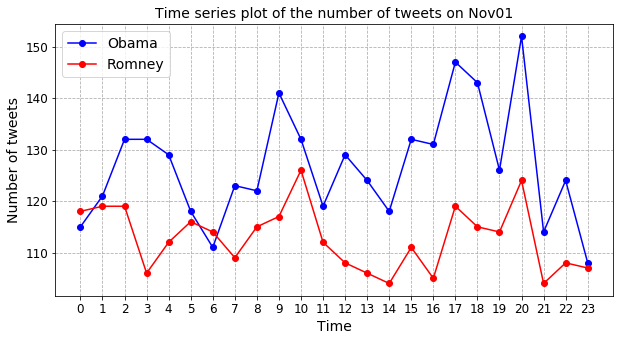

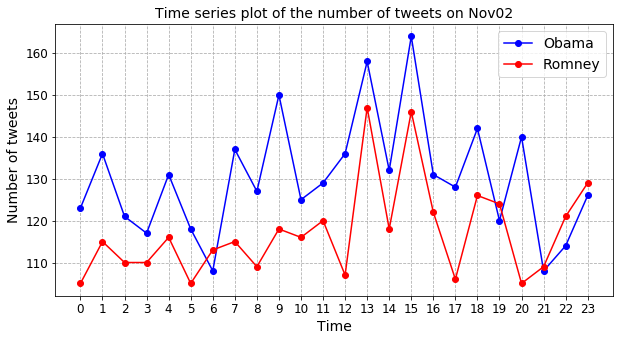

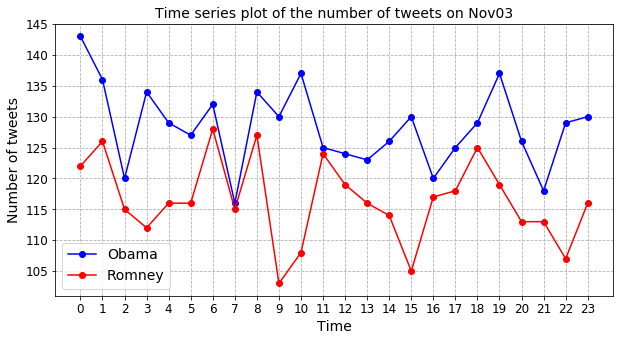

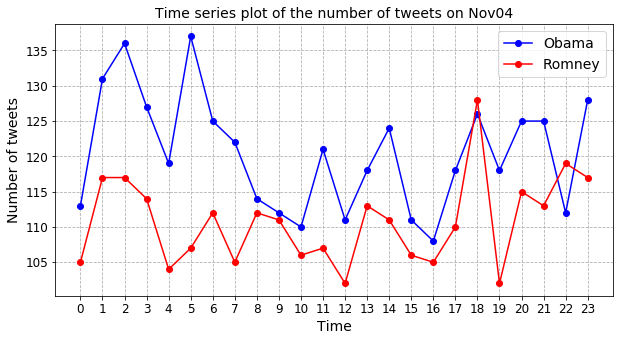

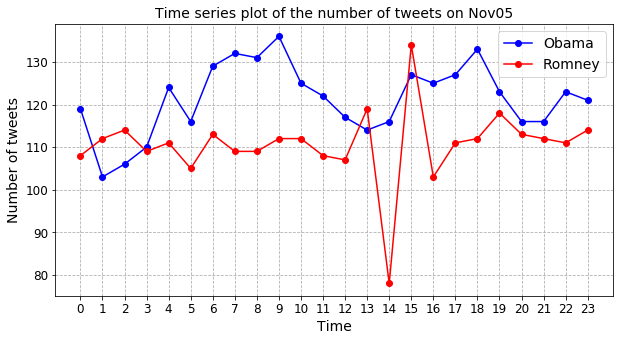

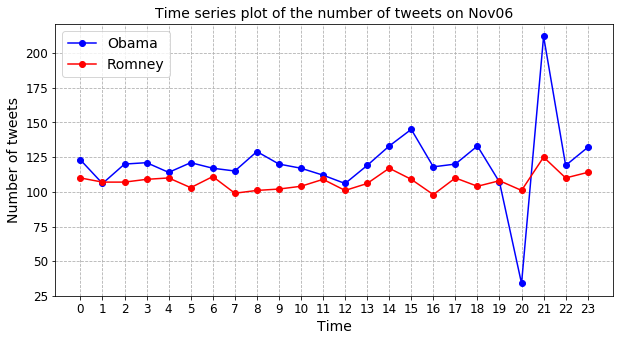

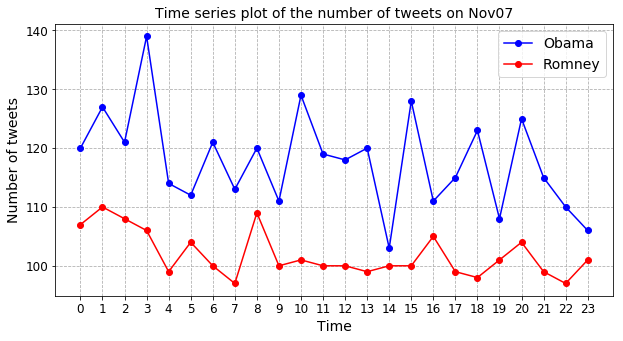

In [6]:
"""
To clearly see the result of each day, time series plot of each day is presented.
"""
begin=0
hour=[]
hourNum=[]
hourNum2=[]

#Group 24-hour data in each day and make a plot for that day
for current in range(len(time)):
    #This hour is the same day
    if time[begin].strftime("%b%d") == time[current].strftime("%b%d") and current!=len(time):
        #The first count of a day
        if len(hour) == 0:
            hour.append(int(time[begin].strftime("%H")))
            hourNum.append(number[begin])
            hourNum2.append(number2[begin])
        hour.append(int(time[current].strftime("%H")))
        hourNum.append(number[current])
        hourNum2.append(number2[current])
        
    #The last hour of a day has been read
    else:            
        plt.figure(figsize=(10,5))
        plt.plot(hour, hourNum, 'o-', color='b', label="Obama")
        plt.plot(hour, hourNum2, 'o-', color='r', label="Romney")
        plt.title("Time series plot of the number of tweets on " + str(time[begin].strftime("%b%d")), fontsize=14)
        plt.xlabel("Time", fontsize=14)
        plt.ylabel("Number of tweets", fontsize=14)
        plt.tick_params(labelsize=12)
        plt.xticks(hour)
        plt.grid(linestyle='--')
        plt.legend(fontsize=14)
        #plt.savefig(str(time[begin].strftime("%b%d")) + ".png")
        plt.show()
        
        begin=current
        hour.clear()
        hourNum.clear()
        hourNum2.clear()

### Analyze tweet text

- Can you think of any problems with this choice of coefficient? Do you know of any better alternatives?

When a word occurs in O corpus 900 times and in R corpus 100 times, the coefficient of this word is 0.8. When a word occurs in O corpus 9 times and in R corpus once, the coefficient of this word is also 0.8. Although these two words have the same coefficient, the first word obviously is more relevant to Obama. Pearson’s correlation coefficient.


- Take a look at the words you find. Do they make sense? Write a few sentences describing what you've found (as comments in the .py file or as markdown-text in the notebook). Does any information about the 2012 election pop out at you?

There are many processed words that seem to be meaningless, so I checked original tweets and found that most of them are retweeted user IDs. Therefore, when the coefficient of a user ID is close to 1, we can conclude that the tweet about Obama from this user is widely retweeted. Also, many words have high coefficient because too many users retweet the same tweet. 


In [7]:
#Count the number of times each word occers in tweets about Obama
obamaCount = {}
for tweet in obamaList:
    for word in tweet[2]:
        try:
            obamaCount[word] += 1
        except KeyError:
            obamaCount[word] = 1

#Count the number of times each word occers in tweets about Romney
romneyCount = {}
for tweet in romneyList:
    for word in tweet[2]:
        try:
            romneyCount[word] += 1
        except KeyError:
            romneyCount[word] = 1          

In [8]:
#Calculate coefficient for all words in tweets contain both Obama and Romney
coefficient = {}
for word in obamaCount:
    obama = obamaCount[word]
    try:
        romney = romneyCount[word]
    except KeyError:
        continue
    coefficient[word] = (obama-romney) / (obama+romney)

In [9]:
#Sort the words by their coefficient from largest to smallest
sortCoefficient = sorted([ (coefficient[word],word) for word in coefficient ], reverse=True)
# Get the top 100 words
topCoefficient = [ word for number,word in sortCoefficient ][:100]  

#Sort the words by their coefficient from smallest to largest
sortCoefficient = sorted([ (coefficient[word],word) for word in coefficient ], reverse=False)
# Get the bottom 100 words
bottomCoefficient = [ word for number,word in sortCoefficient ][:100]

In [10]:
#Write data to a txt file
with open("coefficient.txt", 'w') as file:
    for i in range(100):
        file.write(topCoefficient[i])
        file.write(' ')
        file.write("{:.5f}".format(coefficient[topCoefficient[i]]))
        file.write(' ')
        file.write(bottomCoefficient[i])
        file.write(' ')
        file.write("{:.5f}".format(coefficient[bottomCoefficient[i]]))
        file.write('\n')
file.close()


for i in range(100):
    print(topCoefficient[i].ljust(20), "{:.5f}".format(coefficient[topCoefficient[i]]), end=' ')
    print(bottomCoefficient[i].ljust(20), "{:.5f}".format(coefficient[bottomCoefficient[i]]))



tix                  0.98485 ellenpage            -0.99138
confirm              0.97590 reflect              -0.98571
busabusss            0.97403 freed                -0.98374
z                    0.97333 sethmacfarlane       -0.98165
submit               0.97333 sashay               -0.97895
katyperry            0.97153 sandyshurricane      -0.97661
expertise            0.96970 godspeed             -0.97333
officials            0.96610 considering          -0.97143
magicjohnson         0.96296 remembered           -0.96923
bbcbreaking          0.96296 90999                -0.96757
jay                  0.96117 defiance             -0.96610
instructions         0.95876 futures              -0.95455
animator             0.95833 puto                 -0.95455
seaboard             0.95745 dictated             -0.95312
forall               0.95506 seize                -0.95238
steven               0.95455 47percent            -0.95122
privatesector        0.95455 occasion             -0.951